In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

# Load Data

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_df.shape

(506, 14)

# Task 1: Create a boxplot for the "Median value of owner-occupied homes" variable (MEDV) 

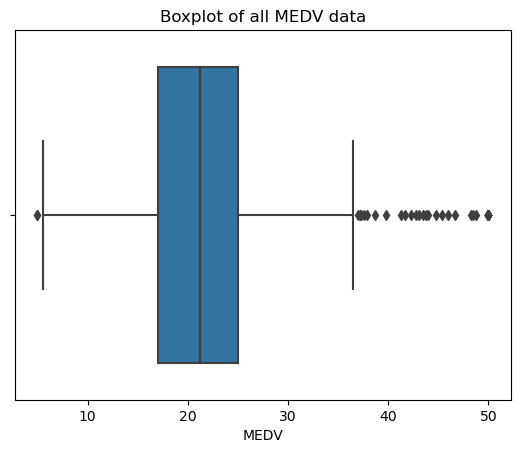

In [5]:
### Boxplot of all MEDV data
ax = sns.boxplot(x='MEDV', data=boston_df)
plt.title("Boxplot of all MEDV data")
plt.show()

# Task 2: Provide a bar plot for the Charles river variable (CHAS)

Text(0.5, 1.0, 'Barplot of CHAS (whether houses are bounded by the Charles river (1) or not (0))')

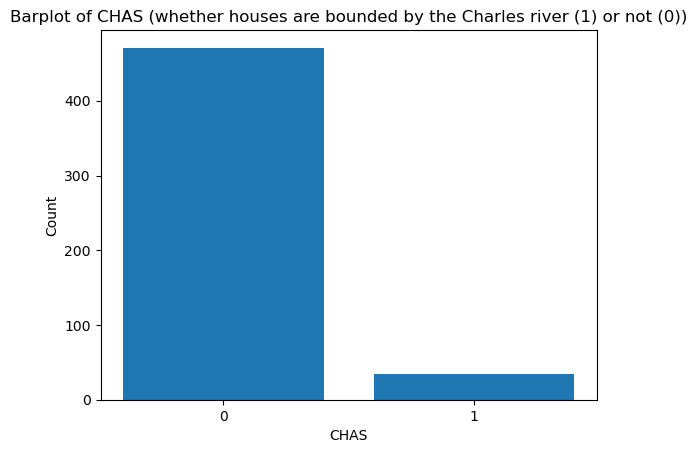

In [6]:
### Barplot of CHAS data
plt.bar(boston_df['CHAS'].unique(),boston_df['CHAS'].value_counts())
plt.xticks(boston_df['CHAS'].unique())
plt.xlabel('CHAS')
plt.ylabel('Count')
plt.title("Barplot of CHAS (whether houses are bounded by the Charles river (1) or not (0))")

# Task 3-1: Provide a bar plot for the median value of houses (MEDV) differentiated by CHAS

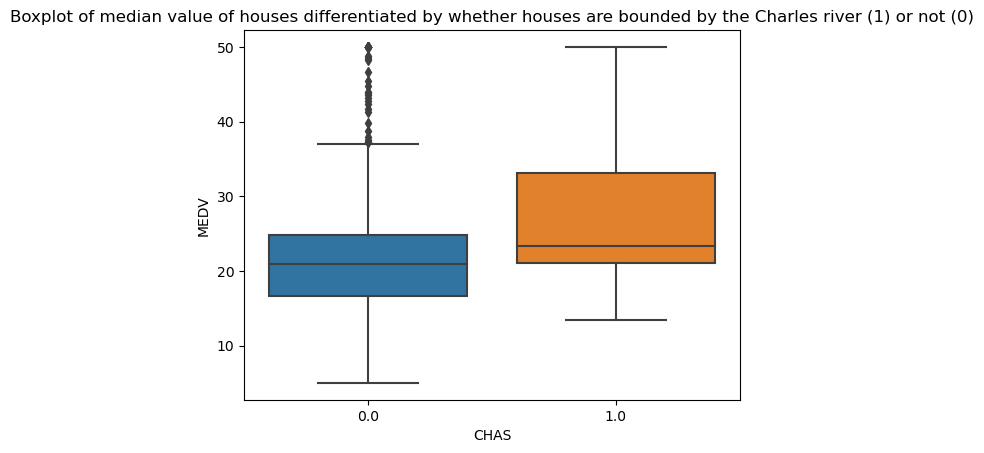

In [7]:
### Boxplot of MEDV data by CHAS
ax = sns.boxplot(x='CHAS', y='MEDV', data=boston_df)
plt.title("Boxplot of median value of houses differentiated by whether houses are bounded by the Charles river (1) or not (0)")
plt.show()

# Task 3-2: Answer the question: "Is there a significant difference in the median value of houses bounded by the Charles river or not?"

### Method: t-test

### Null-hypothesis: "There is NO significant difference in the median value of houses bounded by the Charles river."

### Alternative hypothesis: "There IS significant difference in the median value of houses bounded by the Charles river."|

### alpha = 0.05

In [8]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

### Conclusion: Since p-value (=7.390623170519905e-05) is less than 0.05, we reject the null hypothesis as there is enough proof that there is a statistically significant difference in the median value of houses bounded by the Charles river.

# Task 4-1: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

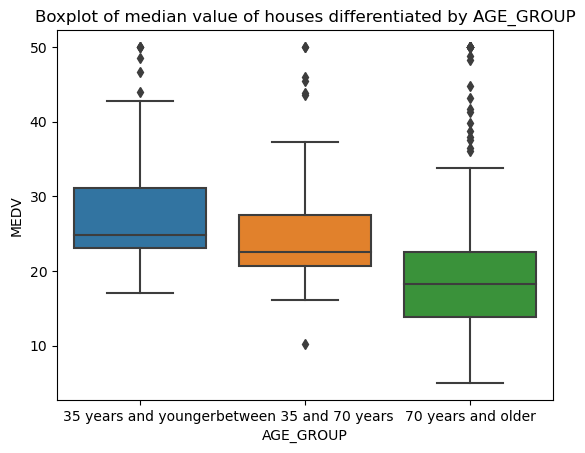

In [9]:
### Boxplot for the MEDV variable vs the AGE variable.

# 1st step: Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 years and older'

# 2nd step: boxplot for MEDV vs. AGE_GROUP
ax = sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df, order=['35 years and younger', 'between 35 and 70 years', '70 years and older'])
plt.title("Boxplot of median value of houses differentiated by AGE_GROUP")
plt.show()

# Task 4-2: Answer the questions: "Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?"

### Method: ANOVA

### Null-hypothesis: "There is NO significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)."

### Alternative hypothesis: "There IS significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)."|

### alpha = 0.05

In [10]:
thirtyFive_lower = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
thirtyFive_seventy = boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyFive_lower, thirtyFive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


### Conclusion: Since p-value (=1.7105011022702984e-15) is less than 0.05, we reject the null hypothesis as there is enough proof that there is a statistically significant difference in the median values of houses for each proportion of owner-occupied units built before 1940

# Task 5-1: Create a scatter plot of Nitric oxide concentrations vs. the proportion of non-retail business acres per town

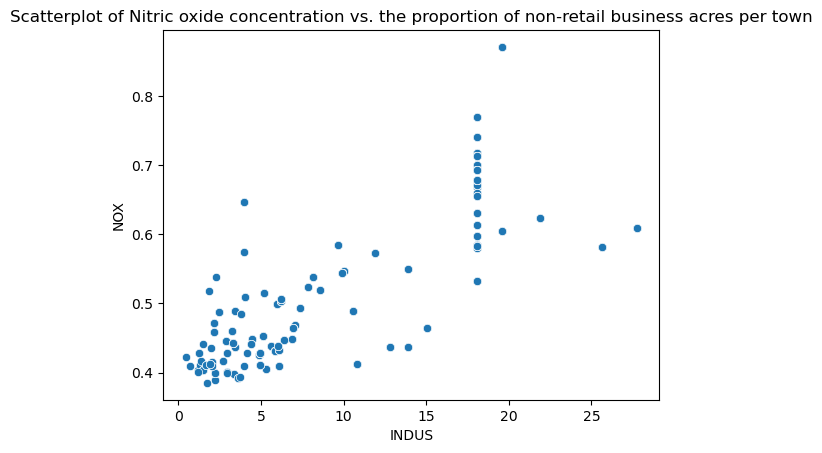

In [11]:
### Scatter plot of Nitric oxide concentrations vs. the proportion of non-retail business acres per town
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title("Scatterplot of Nitric oxide concentration vs. the proportion of non-retail business acres per town")
plt.show()

# Task 5-2: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 

### Method: Pearson Correlation

### Null-hypothesis: "There is NO relationship between Nitric oxide concentrations and proportion of non-retail business acres per town."

### Alternative hypothesis: "There IS a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town."|

### alpha = 0.05

In [12]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

### Conclusion: p_value < 0.05, so we can reject the null hypothesis, and conclude that there IS a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town (as shown in the scatterplot). In fact, the Pearson's coefficient = 0.7636514469209151, which indicates a moderately strong positive correlation.

# Task 6: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? 

### Method: Regression analysis

### Null-hypothesis: "Weighted distance to the five Boston employment centres has NO impact on the median value of owner occupied homes."

### Alternative hypothesis: "Weighted distance to the five Boston employment centres DOES have impact on the median value of owner occupied homes."|

### alpha = 0.05

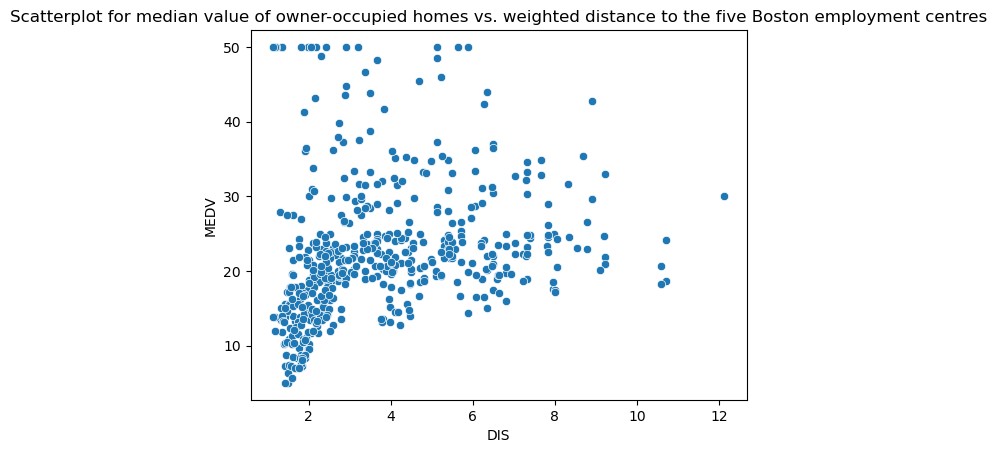

In [13]:
### Scatter plot of the median value of owner-occupied homes vs. weighted distance to the five Boston employment centres
ax = sns.scatterplot(x='DIS', y='MEDV', data=boston_df)
plt.title("Scatterplot for median value of owner-occupied homes vs. weighted distance to the five Boston employment centres")
plt.show()

In [14]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        23:39:20   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion: p < 0.05, so we can reject the null hypothesis and conclude that there is evidence of impact of DIS on MEDV. 
### In fact, R^2 = 0.062, so Pearson coefficient = sqrt(R^2) = 0.25, which indicates that there is a positive dependence of MEDV on DIS.

# Task 7: Create a histogram for the pupil to teacher ratio variable

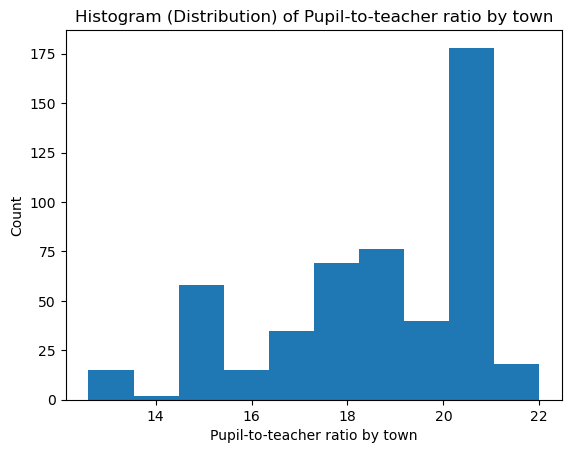

In [15]:
### Histogram of pupil-to-teacher ratio values by town
plt.hist(boston_df['PTRATIO'])
# ax = sns.distplot(boston_df['PTRATIO'], kde = False)
plt.xlabel('Pupil-to-teacher ratio by town')
plt.ylabel('Count')
plt.title("Histogram (Distribution) of Pupil-to-teacher ratio by town")
plt.show()